In [1]:
using DifferentialEquations, CUDA

In [2]:
using Fields

In [3]:
L = 1.5
N = 1000
;

In [4]:
tmax = 2.0
;

In [5]:
dx = L/N
x = 0.0:dx:L
x₀ = 0.0

tsave = 0.0 : 1e-2 : tmax
xsave = N+1 :  10  :  2N
#xsave = 1 :  10  :  N

tspan = (tsave[1], tsave[end])

φ₀   = zero(x)
∂ₜφ₀ = ∂ₜoscillon.(0, x .- x₀);


xsave, tsave

(1001:10:1991, 0.0:0.01:2.0)

In [6]:
energy = SavedValues(Float64, Float64)
cbenergy = SavingCallback(getenergy, energy; saveat=tsave)

hamiltonian = SavedValues(Float64, Vector{Float64})
cbhamiltonian = SavingCallback(gethamiltonian, hamiltonian; saveat=tsave)

callback = CallbackSet(cbenergy, cbhamiltonian)

prob = SecondOrderODEProblem(fieldeq!, ∂ₜφ₀, φ₀, tspan, (N, dx))
;

In [7]:
@time sol = solve(prob, RK4(); adaptive=false, dt=dx / 10, 
                saveat=tsave, save_idxs=xsave, callback=callback)
;

  9.060319 seconds (24.45 M allocations: 1.495 GiB, 8.41% gc time)


In [8]:
#φ = sol.u
φ = transpose(reduce(hcat, sol.u))
#H = reduce(hcat, hamiltonian.saveval)
;

In [9]:
using Plots; gr()
;

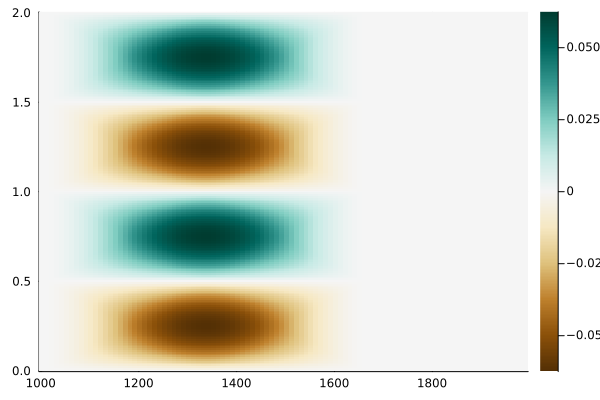

In [10]:
heatmap(xsave, tsave, φ, colormap=:BrBG_11)
#heatmap(xsave, tsave, φ)

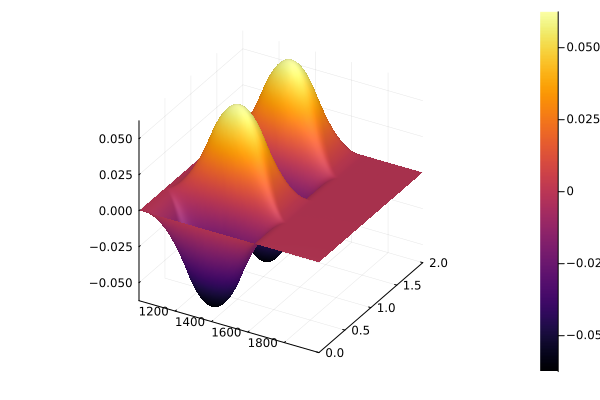

In [11]:
plot(xsave,tsave,φ,st=:surface;)